In [88]:
# Downloads and saves ATNF page
import urllib.request
import time
import re
import pickle

url = 'https://www.atnf.csiro.au/research/pulsar/psrcat/proc_form.php?version=1.62&JName=JName&RaJ=RaJ&DecJ=DecJ&DM=DM&S400=S400&S1400=S1400&S2000=S2000&Assoc=Assoc&R_lum=R_lum&R_lum14=R_lum14&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+with+last+digit+error&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query&table_bottom.x=77&table_bottom.y=17'
#url = 'https://www.atnf.csiro.au/research/pulsar/psrcat/proc_form.php?version=1.62&table_top.x=74&table_top.y=18&RaJ=RaJ&DecJ=DecJ&DM=DM&S400=S400&S1400=S1400&S2000=S2000&Assoc=Assoc&R_lum=R_lum&R_lum14=R_lum14&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+with+last+digit+error&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query'
#url = "https://www.atnf.csiro.au/research/pulsar/psrcat/proc_form.php?version=1.62&RaJ=RaJ&DecJ=DecJ&DM=DM&S400=S400&S1400=S1400&S2000=S2000&Assoc=Assoc&R_lum=R_lum&R_lum14=R_lum14&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+with+errors&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query&table_bottom.x=31&table_bottom.y=23"

with urllib.request.urlopen(url) as response:
   text = response.read().decode("utf-8")


with open('pulsars.page', 'wb') as pulsarDoc:
    pickle.dump(text, pulsarDoc)


In [5]:
#seperates page into individual pulsars and puts into list
import pickle
import re
from astropy.coordinates import SkyCoord
import astropy.units as u

startpos = 33 # which line the content starts on
endpos = -8

with open('pulsars.page', 'rb') as pulsarDoc:
    pulsar_doc = pickle.load(pulsarDoc)
    
pulsars = pulsar_doc.split("\n")

pulsars = pulsars[startpos:len(pulsars)] #This trims it down to only the pulsars
new_pulsars = []

pulsars = pulsars[:(len(pulsars)+endpos-1)]
pulsars[:] = (value for value in pulsars if value != "")



for i in range(len(pulsars)): # turns pulsar string into usable list
    pulsars[i] = pulsars[i].strip()
    pulsars[i] = re.split(r' {2,}', pulsars[i])
    if i == 2270:
        #print(pulsars[i])

        pulsar_fix = pulsars[i][:len(pulsars[i])-2]
        pulsar_fix.append(pulsars[i][-2][:len(pulsars[i][-2])-2])
        pulsar_fix.append(pulsars[i][-2].split(" ")[-1])
        pulsar_fix.append(pulsars[i][-1])
        pulsars[i] = pulsar_fix
        #print(pulsar_fix)
for i in pulsars:
    c = SkyCoord(i[3], i[6], unit=(u.hourangle, u.deg))
    i.append(c)
with open('pulsars.list', 'wb') as pulsarDoc:
    pickle.dump(pulsars, pulsarDoc)


<SkyCoord (ICRS): (ra, dec) in deg
    (0.742375, 62.26927778)>


In [7]:
# takes pulsar list and turns it into astropy table
from astropy.table import QTable
import astropy.units as u
import numpy as np
import pickle
with open('pulsars.list', 'rb') as pulsarDoc:
    pulsars = pickle.load(pulsarDoc)

name = list((value[1] for value in pulsars))
print(name[0])
pRA = list((value[3] for value in pulsars))
pRAError = list((value[4] for value in pulsars))



pDEC = list((value[6] for value in pulsars))
pDECError = list((value[7] for value in pulsars))


DM = list((value[9] for value in pulsars))
DMError = list((value[10] for value in pulsars))


S400 = list((value[12] for value in pulsars))
S400Error = list((value[13] for value in pulsars))

S1400 = list((value[15] for value in pulsars))
S1400Error = list((value[16] for value in pulsars))

S2000 = list((value[18] for value in pulsars))
S2000Error = list((value[19] for value in pulsars))

assoc = list((value[21] for value in pulsars))

lum = list((value[22] for value in pulsars))

lum14=list((value[23] for value in pulsars))

skycoord=list((value[-1] for value in pulsars))


pulsar_table = QTable([pRA,pRAError, pDEC, pDECError, DM, DMError,S400, S400Error, S1400, S1400Error, S2000, S2000Error
                      , lum, lum14,assoc, name,skycoord],
                 names=('pRA','pRAError','pDEC','pDECError', "DM", "DMError", 'S400', "S400Error", "S1400", "S1400Error"
                       ,"S2000", "S2000Error", "lum", 'lum14', 'assoc', 'name','skycoord'),
                 meta={'name' : 'Pulsar Locations'})
print(pulsar_table[0])
with open('pulsars.table', 'wb') as pulsarDoc:
    pickle.dump(pulsar_table, pulsarDoc)

J0002+6216
    pRA     pRAError     pDEC    pDECError   DM  DMError S400 S400Error S1400 S1400Error S2000 S2000Error lum lum14                                                                                                                   assoc                                                                                                                       name             skycoord         
                                                                                                                                                                                                                                                                                                                                                                                   deg,deg          
----------- -------- ----------- --------- ----- ------- ---- --------- ----- ---------- ----- ---------- --- ----- -----------------------------------------------------------------------------------------------

In [8]:
# Test cell only, not relavent 
import tableGet as tg
#V[num] is the version number of the matarial source. Creates new table with no delations of old ones
#hasDM - it has a measured DM
#posErrorASec[num] has an error in position less than a specific number of arcseconds
#posRange[num1,num2,num3,num4] Declination and RA ranges (low-high), 



table = tg.tableGet(["V[test1]","hasDM", "posErrorASec[01]", "posRange[0:0:0.0,10:0:0.0,-90:0:0.0,90:0:0.0]"])

print(len(table))

print(table[15])

# range part and shit seems to be broken, fix tomorrow morning?

335
     pRA      pRAError      pDEC     pDECError   DM  DMError S400 S400Error S1400 S1400Error S2000 S2000Error lum lum14                                                   assoc                                                        name                  skycoord              
                                                                                                                                                                                                                                                             deg,deg               
------------- -------- ------------- --------- ----- ------- ---- --------- ----- ---------- ----- ---------- --- ----- ---------------------------------------------------------------------------------------------------------- ----------- ------------------------------------
00:23:54.4899        3 -72:05:30.756         2 24.43       2    *         0     *          0     *          0   *     * GC:47Tuc,XRS:[<a href="http://www.atnf.csiro.au/

In [9]:
# goes through and finds all objects in the tables from the mosiacs, putting them into a single list

import os
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u

import re
import time
path = 'tables/racs_catv'
file_names = os.listdir(path)
file_infos = []

#print(file_names)

for i in file_names: 
    if 'selavy.txt' in i:
        file = open(path + "/" + i, "r")
        file_info = file.read().split("\n")
        mos_filename = file_info[4][67:]
        items = file_info[47:]
        # ObjID Name X Y Z RA DEC RA DEC VEL MAJ MIN PA w_RA w_DEC w_50 w_20 w_VEL F_int F_tot F_peak 
        # X1 X2 Y1 Y2 Z1 Z2 Nvoxel Nchan Nspatpix Flag X_av Y_av Z_av X_cent Y_cent Z_cent X_peak Y_peak Z_peak
        # [deg] [deg] [arcsec] [arcsec] [deg] [arcmin] [arcmin] [Jy]  [Jy/beam] [Jy/beam] 
        for ii in range(len(items)):
            items[ii] = re.split(r' {1,}', items[ii].strip())
            #print(items[ii])
            if len(items[ii]) != 1:
                c = SkyCoord(items[ii][5], items[ii][6], unit=(u.hourangle, u.deg))
    
                items[ii].append(c)
                #print(items[ii][5], items[ii][6])
                #print(c)
        #print(c)
        #print(items)
        #print(mos_filename + "   ," +  i)
        file_infos.append([mos_filename, items])

amount = 0        
for i in file_infos:
    #print(len(i[1]))
    if len(i[1]) ==0:
        amount += 1
print(amount)
print(len(file_infos))
with open('table_info', 'wb') as table_infos:
    pickle.dump(file_infos, table_infos)

0
1797


In [2]:
# Turns objects from mosiacs into list of sky coord from astropy and checks them against pulsars
from astropy.coordinates import match_coordinates_sky
import tableGet as tg
import pickle
from astropy.coordinates import SkyCoord
import astropy.units as u

with open('table_info', 'rb') as objectDoc:
    skyObjects = pickle.load(objectDoc)
coordList = []
for i in skyObjects:
    for j in i[1]:
        try:
            coordList.append([j[5],j[6],i[0]])
        except:
            pass
print(len(coordList))
catalog = SkyCoord(ra = (i[0] for i in coordList), dec = (i[1] for i in coordList), unit=(u.hourangle, u.deg))
pulsars = tg.tableGet(["V[test2]","hasDM", "posErrorASec[01]", "posRange[0:0:0.0,24:0:0.0,-90:0:0.0,90:0:0.0]"])
matches = []
for i in pulsars:
    match = i[-1].match_to_catalog_sky(catalog)
    matches.append([match,i,coordList[match[0]][2]])

print(len(matches))

#print(pulsars[10])


132734
2418


In [8]:
# Crops the matches
import astropy.units as u
#print(matches[0][2])
close_matches = []
for i in matches:
    if (i[0][1] < 5 * u.arcsec)[0]:
        #print(i[1][0].split(":"))
        if len(i[1][0].split(":")) == 3 and len(i[1][2].split(":")) == 3:

            close_matches.append(i)

for i in close_matches:
    print(i[-1])


RACS_test4_1.05_0303+18A-selavy.txt
nRACS_test4_1.05_0455-50A-selavy.txt
nRACS_test4_1.05_0445-80A-selavy.txt
nRACS_test4_1.05_0553+25A-selavy.txt
RACS_test4_1.05_0632+18A-selavy.txt
nRACS_test4_1.05_0620-25A-selavy.txt
nRACS_test4_1.05_0805-71A-selavy.txt
nRACS_test4_1.05_0715-43A-selavy.txt
nRACS_test4_1.05_0741-25A-selavy.txt
nRACS_test4_1.05_0825-12A-selavy.txt
RACS_test4_1.05_0840-37A-selavy.txt
nRACS_test4_1.05_0822-43A-selavy.txt
RACS_test4_1.05_0855-43A-selavy.txt
RACS_test4_1.05_0918+06A-selavy.txt
RACS_test4_1.05_0941-12A-selavy.txt
nRACS_test4_1.05_1008+06A-selavy.txt
nRACS_test4_1.05_1008+06A-selavy.txt
nRACS_test4_1.05_1045-62A-selavy.txt
nRACS_test4_1.05_1122+12A-selavy.txt
RACS_test4_1.05_1135-62A-selavy.txt
RACS_test4_1.05_1224-62A-selavy.txt
RACS_test4_1.05_1314-62A-selavy.txt
RACS_test4_1.05_1224-62A-selavy.txt
RACS_test4_1.05_1314-62A-selavy.txt
RACS_test4_1.05_1345-56A-selavy.txt
RACS_test4_1.05_1314-62A-selavy.txt
RACS_test4_1.05_1404-62A-selavy.txt
RACS_test4_1.05

In [9]:
# Creates region file
import pickle

region_info = """# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5"""

for i in close_matches:
    region_info += "\n" + "circle(" + i[1][0] + "," + i[1][2] + "," + str(360) +'")'
print(region_info)
file = open("regions","w") 
file.write(region_info)
file.close() 


# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
circle(00:02:58.17,+62:16:09.4,360")
circle(00:06:04.8,+18:34:59,360")
circle(00:14:17.75,+47:46:33.4,360")
circle(00:23:16.878141,+09:23:23.8652,360")
circle(00:24:05.67,-72:04:52.62,360")
circle(00:24:08.1615,-72:04:47.602,360")
circle(00:23:50.3546,-72:04:31.5048,360")
circle(00:24:13.88092,-72:04:43.8524,360")
circle(00:24:11.10528,-72:05:20.1492,360")
circle(00:24:03.85547,-72:04:42.8183,360")
circle(00:24:07.9603,-72:04:39.7030,360")
circle(00:24:06.7032,-72:04:06.8067,360")
circle(00:24:07.9347,-72:04:39.6815,360")
circle(00:23:59.4077,-72:03:58.7908,360")
circle(00:24:03.7721,-72:04:56.923,360")
circle(00:23:54.4899,-72:05:30.756,360")
circle(00:24:09.1880,-72:04:28.8907,360")
circle(00:24:04.65254,-72:04:53.7670,360")
circle(00:24:20,-72:04:10,360")
circle(00:24:16.4909,-72:04:25.1644,360

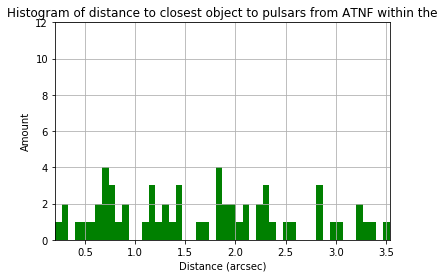

In [4]:
#Histogram of how close matches are overall
import astropy.units as u

import numpy as np
import matplotlib.pyplot as plt

distances = []
for i in close_matches:
    distances.append(i[0][1][0].decompose() * (206265/u.rad))
    
distances.sort()
#print(distances)

plt.hist(distances, 50, facecolor='g')
plt.xlabel('Distance (arcsec)')
plt.ylabel('Amount')
plt.title('Histogram of distance to closest object to pulsars from ATNF within the')
plt.xlim(distances[0], distances[-1])
plt.ylim(0, len(distances)/5)
plt.grid(True)
#plt.figure(figsize=(200,10))
plt.show()